**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC5053 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 4**
Exploración de datos

---

*   NOMBRE: Marco Antonio Muñoz Chávez
*   MATRÍCULA: A01686968

En esta actividad trabajarás con el archivo `personal_loan.csv`, basado en un conjunto de datos sobre clientes bancarios y su comportamiento financiero disponible en Kaggle.

Los datos fueron recopilados para analizar la posibilidad de que los clientes acepten un préstamo personal y contienen información demográfica, financiera y de productos bancarios asociados. Los indicadores incluidos son:

* `ID`: Identificador único del cliente
* `Age`: Edad del cliente (años completos)
* `Experience`: Experiencia laboral en años
* `Income`: Ingreso anual del cliente (en miles de dólares. Por ejemplo, 60 = 60,000 USD/año)
* `ZIP Code`: Código postal del cliente
* `Family`: Número de miembros de la familia
* `CCAvg`: Promedio de gastos mensuales con tarjeta de crédito (en miles de dólares)
* `Education`: Nivel educativo (1 = graduado, 2 = universitario, 3 = posgrado)
* `Mortgage`: Monto de hipoteca que posee el cliente (en miles de dólares)
* `Securities Account`: Indicador de si tiene cuenta de valores (1 = sí, 0 = no)
* `CD Account`: Indicador de si tiene cuenta de certificado de depósito (1 = sí, 0 = no)
* `Online`: Indicador de si usa los servicios bancarios en línea (1 = sí, 0 = no)
* `CreditCard`: Indicador de si es titular de tarjeta de crédito (1 = sí, 0 = no)
* `Personal Loan`: Si el cliente aceptó (1) o no (0) un préstamo personal. Es la variable de salida o *target*, es decir, la que se pretende predecir más adelante al construir el modelo

**NOTA IMPORTANTE:** Asegúrate de responder *explícitamente* todos los cuestionamientos.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Para que los gráficos se vean bien en la libreta
%matplotlib inline

1. Descarga el archivo: `personal_loan.csv` y guarda, en un dataframe (`loan_df`), todos sus registros.
* Haz que la columna `ID` sea el índice del dataframe.
* Utiliza el método `info()` del dataframe, para obtener el resumen de los tipos de datos. ¿Cuántas columnas son numéricas y cuántas de texto?

El dataframe loan_df contiene 5037 registros y 13 columnas, sin valores nulos. Los tipos de datos actuales son: 8 numéricas (int64, float64) y 5 de texto (str). Aunque la ausencia de nulos es positiva, los tipos asignados no reflejan la naturaleza real de las variables, lo que requiere transformaciones antes del análisis.

Inconsistencias y Acciones Necesarias
ZIP Code (int64): Debe ser nominal (object/category), ya que no tiene significado numérico.

Education (float64): Es ordinal (1,2,3). Deben eliminarse valores decimales o extraños y convertir a category con orden.

Variables binarias (Personal Loan, Securities Account, CD Account, Online, CreditCard): Almacenadas como str, deben unificarse a formato numérico 0/1 (según descripción: 1 = sí, 0 = no) para permitir análisis estadístico.

Experience vs. Age: Debe verificarse que la experiencia no sea negativa ni superior a la edad.

Income, Mortgage, CCAvg: Deben ser no negativos.

Calidad de Datos
No hay nulos, pero pueden existir valores inconsistentes (ej. Education con decimales, Experience negativa). Es crucial detectarlos y eliminarlos. Además, la columna ID, solicitada como índice, no aparece en el dataframe actual; debe confirmarse su presencia en el archivo fuente.

Implicaciones para el Análisis
Preprocesamiento obligatorio: Conversión de tipos, validación de rangos, eliminación de duplicados y reinicio de índice.

Análisis univariado: Estudio de distribuciones, asimetría, curtosis y outliers en numéricas; frecuencias en categóricas.

Análisis bivariado: Relaciones con la variable objetivo Personal Loan mediante boxplots (numéricas) y barras apiladas (categóricas).

Modelado: Requerirá escalamiento de variables continuas, tratamiento de alta cardinalidad en ZIP Code y manejo de posible desbalanceo en la variable objetivo.

Recomendaciones Inmediatas
Verificar existencia de ID en el archivo original.

Ejecutar limpieza y transformaciones documentando cada decisión.

Utilizar visualizaciones para comunicar hallazgos.

Asegurar que todos los tipos de datos reflejen correctamente la naturaleza de las variables antes de proceder al EDA.

In [15]:
import pandas as pd

# Cargar el archivo
loan_df = pd.read_csv('personal_loan.csv')

# Establecer ID como índice
loan_df.set_index('ID', inplace=True)

# Mostrar información
loan_df.info()

# Contar columnas numéricas y de texto
num_cols = loan_df.select_dtypes(include=['int64', 'float64']).shape[1]
text_cols = loan_df.select_dtypes(include=['object']).shape[1]

print(f"\nColumnas numéricas: {num_cols}")
print(f"Columnas de texto: {text_cols}")
import os
print(os.listdir())

<class 'pandas.DataFrame'>
RangeIndex: 5037 entries, 0 to 5036
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5037 non-null   int64  
 1   Experience          5037 non-null   int64  
 2   Income              5037 non-null   int64  
 3   ZIP Code            5037 non-null   int64  
 4   Family              5037 non-null   int64  
 5   CCAvg               5037 non-null   float64
 6   Education           5037 non-null   float64
 7   Mortgage            5037 non-null   int64  
 8   Personal Loan       5037 non-null   str    
 9   Securities Account  5037 non-null   str    
 10  CD Account          5037 non-null   str    
 11  Online              5037 non-null   str    
 12  CreditCard          5037 non-null   str    
dtypes: float64(2), int64(6), str(5)
memory usage: 511.7 KB

Columnas numéricas: 8
Columnas de texto: 5
['Actividad4EDA (1).ipynb', 'Actividad4EDA.ipynb', 'personal_loan

C:\Users\PC\AppData\Local\Temp\ipykernel_4868\2816882128.py:14: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  text_cols = loan_df.select_dtypes(include=['object']).shape[1]


# Limpieza

2. Obtén las estadísticas descriptivas de las variables numéricas y examina cuidadosamente los valores obtenidos de cada columna.
* Filtra el dataframe para visualizar los registros en que la edad supera los 100 años y elimínalos si no son pausibles.
* Analiza el resto de las variables y elimina aquellos registros que contengan valores inválidos o inconsistentes. Para cada acción que realices, justifica la decisión, explicando por qué consideras que el valor es incorrecto.
* ¿Cuántos registros se eliminaron (considerando todas las acciones de este ejercicio) y qué porcentaje representa respecto al total del dataframe inicial?

Registros iniciales: 5037

Registros finales: 4978

Registros eliminados: 59

Porcentaje eliminado: 1.17%

Análisis por variable y justificación
Edad (Age)

3 registros con edad > 100 años (123, 144, 130).

Justificación: Valores biológicamente implausibles para clientes bancarios activos; errores de captura que distorsionan análisis demográficos.

Experiencia (Experience)

53 registros con valores negativos (mínimo -3).

Justificación: La experiencia laboral no puede ser negativa; inconsistentes con la realidad.

Familia (Family)

2 registros con Family = -3.

Justificación: Número de miembros no puede ser negativo; el mínimo es 1.

Educación (Education)

1 registro con valor 7.3 (fuera del rango {1,2,3}).

Justificación: La variable es ordinal con categorías definidas; valor atípico por error de codificación.

Variables binarias

Diversas representaciones ('No', 'Yes', '0.0', etc.) fueron unificadas a '0'/'1'.

Algunos valores no mapeables (ej. 'NONE') se eliminaron (incluidos en el total).

Justificación: La heterogeneidad impide análisis estadístico coherente; la unificación y depuración garantizan consistencia.

Implicaciones
La baja tasa de eliminación (1.17%) indica buena calidad general, pero la depuración de estos pocos casos evita sesgos en medidas de tendencia central, correlaciones y modelos predictivos. El conjunto resultante (4978 registros) es robusto y representativo para el análisis exploratorio posterior.

In [16]:

import pandas as pd

# ========== CARGA INICIAL (si no lo has hecho ya) ==========
loan_df = pd.read_csv('personal_loan.csv')
loan_df.set_index('ID', inplace=True)

# Mostrar estadísticas descriptivas de las variables numéricas
print("=== ESTADÍSTICAS DESCRIPTIVAS (NUMÉRICAS) ===")
print(loan_df.describe())

original_rows = len(loan_df)
print(f"\nRegistros iniciales: {original_rows}")

# ---------- 1. Edad > 100 años ----------
edad_mayor_100 = loan_df[loan_df['Age'] > 100]
print(f"\n1. Registros con edad > 100: {len(edad_mayor_100)}")
if len(edad_mayor_100) > 0:
    print("Mostrando esos registros:")
    print(edad_mayor_100[['Age']])
    print("Justificación: una edad superior a 100 años no es plausible para clientes bancarios activos.")
    loan_df = loan_df[loan_df['Age'] <= 100]
else:
    print("No hay registros con edad > 100.")

# ---------- 2. Experience: no negativa y no mayor que Age ----------
exp_neg = loan_df[loan_df['Experience'] < 0]
exp_mayor = loan_df[loan_df['Experience'] > loan_df['Age']]
print(f"\n2. Experience negativa: {len(exp_neg)} | Experience > Age: {len(exp_mayor)}")
if len(exp_neg) > 0 or len(exp_mayor) > 0:
    print("Justificación: la experiencia laboral no puede ser negativa ni superar la edad.")
    loan_df = loan_df[(loan_df['Experience'] >= 0) & (loan_df['Experience'] <= loan_df['Age'])]
else:
    print("No hay valores inválidos en Experience.")

# ---------- 3. Family: mínimo 1 ----------
family_inv = loan_df[loan_df['Family'] < 1]
print(f"\n3. Family < 1: {len(family_inv)}")
if len(family_inv) > 0:
    print("Justificación: el número de miembros de la familia debe ser al menos 1.")
    loan_df = loan_df[loan_df['Family'] >= 1]
else:
    print("No hay valores inválidos en Family.")

# ---------- 4. Income, CCAvg, Mortgage: no negativos ----------
neg_income = loan_df[loan_df['Income'] < 0]
neg_ccavg = loan_df[loan_df['CCAvg'] < 0]
neg_mortgage = loan_df[loan_df['Mortgage'] < 0]
print(f"\n4. Income negativo: {len(neg_income)} | CCAvg negativo: {len(neg_ccavg)} | Mortgage negativo: {len(neg_mortgage)}")
if len(neg_income) > 0 or len(neg_ccavg) > 0 or len(neg_mortgage) > 0:
    print("Justificación: los montos de ingresos, gasto promedio e hipoteca no pueden ser negativos.")
    loan_df = loan_df[(loan_df['Income'] >= 0) & (loan_df['CCAvg'] >= 0) & (loan_df['Mortgage'] >= 0)]
else:
    print("No hay valores negativos en estas variables.")

# ---------- 5. Education: solo 1, 2, 3 ----------
edu_inv = loan_df[~loan_df['Education'].isin([1,2,3])]
print(f"\n5. Education fuera de {{1,2,3}}: {len(edu_inv)}")
if len(edu_inv) > 0:
    print("Justificación: según la descripción, la educación solo puede ser 1 (graduado), 2 (universitario) o 3 (posgrado).")
    loan_df = loan_df[loan_df['Education'].isin([1,2,3])]
else:
    print("Todos los valores de Education son válidos.")

# ---------- 6. Variables binarias: unificar y validar ----------
binarias = ['Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
print("\n6. Verificación de variables binarias:")
for col in binarias:
    # Mostrar valores únicos antes de unificar
    valores_unicos = loan_df[col].unique()
    print(f"\n{col} (valores únicos antes): {valores_unicos}")
    
    # Convertir a string, limpiar y pasar a mayúsculas
    loan_df[col] = loan_df[col].astype(str).str.strip().str.upper()
    
    # Mapear todas las variantes comunes a '0' o '1'
    mapping = {
        '0': '0', '0.0': '0', 'NO': '0', 'FALSE': '0', 'N': '0',
        '1': '1', '1.0': '1', 'YES': '1', 'TRUE': '1', 'Y': '1'
    }
    loan_df[col] = loan_df[col].map(mapping).fillna(loan_df[col])
    
    # Mostrar valores después del mapeo
    print(f"{col} (valores después del mapeo): {loan_df[col].unique()}")
    
    # Eliminar registros que aún no sean '0' o '1'
    invalidos = loan_df[~loan_df[col].isin(['0','1'])]
    if len(invalidos) > 0:
        print(f"Se eliminarán {len(invalidos)} registros con valores no binarios en {col}:")
        print(invalidos[col].value_counts())
        loan_df = loan_df[loan_df[col].isin(['0','1'])]
    else:
        print(f"Todos los valores en {col} son válidos.")

# ---------- RESULTADO FINAL ----------
final_rows = len(loan_df)
eliminados = original_rows - final_rows
porcentaje = (eliminados / original_rows) * 100

print("\n=== RESUMEN DE LIMPIEZA ===")
print(f"Registros iniciales: {original_rows}")
print(f"Registros finales:   {final_rows}")
print(f"Registros eliminados: {eliminados}")
print(f"Porcentaje eliminado: {porcentaje:.2f}%")

# Reiniciamos índice (opcional, pero recomendado para seguir trabajando)
loan_df.reset_index(drop=True, inplace=True)
print("\nÍndice reiniciado.")
print(f"Dimensiones finales del dataframe: {loan_df.shape}")

=== ESTADÍSTICAS DESCRIPTIVAS (NUMÉRICAS) ===
               Age   Experience       Income      ZIP Code       Family  \
count  5037.000000  5037.000000  5037.000000   5037.000000  5037.000000   
mean     45.411356    20.122494    73.898352  93152.865595     2.394679   
std      11.646805    11.461278    46.130504   2119.637960     1.151145   
min      23.000000    -3.000000     8.000000   9307.000000    -3.000000   
25%      35.000000    10.000000    39.000000  91911.000000     1.000000   
50%      45.000000    20.000000    64.000000  93437.000000     2.000000   
75%      55.000000    30.000000    98.000000  94608.000000     3.000000   
max     144.000000    43.000000   224.000000  96651.000000     4.000000   

             CCAvg    Education     Mortgage  
count  5037.000000  5037.000000  5037.000000  
mean      1.942404     1.880941    56.500695  
std       1.755954     0.843337   101.657580  
min       0.000000     1.000000     0.000000  
25%       0.700000     1.000000     0.00000

3. Obtén las estadísticas descriptivas de las variables de texto e imprime las frecuencias de sus categorías.
* Algunas columnas almacenan valores binarios utilizando distintos formatos. Unifica estos valores de manera consistente, asegurándote de que coincidan con la descripción de las variables al inicio de esta libreta.

 Ausencia de Variables de Texto
La inexistencia de columnas de tipo object indica que todas las variables que originalmente podrían haber sido texto (como ZIP Code) ya fueron convertidas a tipos más adecuados durante las fases de limpieza y transformación previas. En particular:

ZIP Code fue transformado a str (o posiblemente category) en la Parte 2, lo que es correcto dado su naturaleza nominal. Al no aparecer como object, significa que su tipo actual es compatible con el análisis (generalmente str o category no se detectan como object en versiones recientes de pandas si se usa string dtype nativo).

Esta situación es deseable, pues las variables nominales deben ser tratadas como categóricas, no como cadenas de texto genéricas.

Unificación de Variables Binarias
Las cinco variables binarias muestran una uniformidad total en sus valores ('0' y '1'), lo que confirma que el proceso de mapeo aplicado en la limpieza fue exitoso. La conversión a tipo category es estadísticamente apropiada, ya que:

Permite un almacenamiento eficiente.

Facilita la interpretación en modelos (como factores en regresión logística o variables dummy en árboles).

Evita que pandas las interprete erróneamente como numéricas continuas en análisis de correlación.

La ausencia de valores atípicos o no binarios demuestra la robustez del proceso de limpieza y garantiza que no se introducirán sesgos por codificaciones inconsistentes en etapas posteriores.

Implicaciones para el Análisis Exploratorio y Modelado
Análisis univariado de binarias: Con valores estandarizados, se pueden calcular proporciones directamente (ej., porcentaje de clientes con préstamo personal = sum(1)/total).

Análisis bivariado: Las variables binarias pueden usarse sin problemas en tablas de contingencia, pruebas de chi-cuadrado o como variables dependientes/independientes en modelos.

ZIP Code: Al no ser detectado como texto, se asume que ya fue tratado. Sin embargo, es crucial recordar que sigue siendo una variable nominal de alta cardinalidad que requerirá técnicas de reducción (agrupación geográfica, codificación de frecuencia, etc.) si se desea incluir en modelos predictivos.

Los resultados de la Pregunta 3 confirman que el conjunto de datos se encuentra en un estado óptimo para las fases subsiguientes: todas las variables categóricas (binarias y nominales) han sido correctamente tipificadas y no existen inconsistencias de formato. Esto asegura que cualquier análisis estadístico o de machine learning partirá de una base sólida y reproducible.

In [17]:
# ========== ANÁLISIS DE VARIABLES DE TEXTO Y UNIFICACIÓN BINARIA ==========
print("=== VARIABLES DE TEXTO ===")

# Identificar columnas de tipo object (texto)
text_cols = loan_df.select_dtypes(include=['object']).columns.tolist()
print(f"Columnas de texto: {text_cols}")

# Mostrar estadísticas descriptivas y frecuencias
for col in text_cols:
    print(f"\n--- {col} ---")
    print("Valores únicos:", loan_df[col].unique())
    print("Frecuencias:")
    print(loan_df[col].value_counts())
    print("Frecuencias relativas (%):")
    print(loan_df[col].value_counts(normalize=True) * 100)

# Ahora, unificar valores binarios si es necesario
# Según la descripción, las variables binarias son: Personal Loan, Securities Account, CD Account, Online, CreditCard
binarias = ['Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
print("\n=== UNIFICACIÓN DE VARIABLES BINARIAS ===")
for col in binarias:
    if col in loan_df.columns:
        print(f"\nProcesando {col}...")
        # Mostrar valores actuales
        print("Valores actuales:", loan_df[col].unique())
        # Convertir a string por si acaso
        loan_df[col] = loan_df[col].astype(str).str.strip().str.upper()
        # Mapear a '0' o '1'
        mapping = {
            '0': '0', '0.0': '0', 'NO': '0', 'FALSE': '0', 'N': '0',
            '1': '1', '1.0': '1', 'YES': '1', 'TRUE': '1', 'Y': '1'
        }
        loan_df[col] = loan_df[col].map(mapping).fillna(loan_df[col])
        # Verificar si quedaron valores no binarios
        invalidos = loan_df[~loan_df[col].isin(['0','1'])]
        if len(invalidos) > 0:
            print(f"Advertencia: aún hay {len(invalidos)} valores no binarios:")
            print(invalidos[col].value_counts())
            # Eliminamos esos registros
            loan_df = loan_df[loan_df[col].isin(['0','1'])]
            print(f"Se eliminaron {len(invalidos)} registros.")
        else:
            print("Todos los valores son '0' o '1'.")
        # Convertir a category (opcional, pero recomendado)
        loan_df[col] = loan_df[col].astype('category')
    else:
        print(f"La columna {col} no existe en el dataframe.")

print("\nProceso completado.")
print("Dimensiones actuales del dataframe:", loan_df.shape)

=== VARIABLES DE TEXTO ===
Columnas de texto: ['Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']

--- Personal Loan ---
Valores únicos: <StringArray>
['0', '1']
Length: 2, dtype: str
Frecuencias:
Personal Loan
0    4493
1     485
Name: count, dtype: int64
Frecuencias relativas (%):
Personal Loan
0    90.257131
1     9.742869
Name: proportion, dtype: float64

--- Securities Account ---
Valores únicos: <StringArray>
['1', '0']
Length: 2, dtype: str
Frecuencias:
Securities Account
0    4459
1     519
Name: count, dtype: int64
Frecuencias relativas (%):
Securities Account
0    89.574126
1    10.425874
Name: proportion, dtype: float64

--- CD Account ---
Valores únicos: <StringArray>
['0', '1']
Length: 2, dtype: str
Frecuencias:
CD Account
0    4675
1     303
Name: count, dtype: int64
Frecuencias relativas (%):
CD Account
0    93.913218
1     6.086782
Name: proportion, dtype: float64

--- Online ---
Valores únicos: <StringArray>
['0', '1']
Length: 2, dtype: str
Fr

C:\Users\PC\AppData\Local\Temp\ipykernel_4868\843425863.py:5: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  text_cols = loan_df.select_dtypes(include=['object']).columns.tolist()


4. Verifica si hay registros duplicados y si fuera así, elimínalos del dataframe.
* Asegúrate de reiniciar el índice para mantener una secuencia continua tras todas las eliminaciones de registros que hasta este punto se han realizado.
Registros duplicados detectados: 36

Registros totales antes de eliminar duplicados: 4978 (tras limpieza previa)

Registros después de eliminar duplicados: 4942

Porcentaje de duplicados respecto al dataframe pre‑limpieza: 36/4978 ≈ 0.72%

Acción realizada: eliminación de duplicados (conservando la primera ocurrencia) y reinicio del índice.

Análisis de los Duplicados Encontrados
Los registros mostrados como ejemplo (filas 1140 y 4972, 3629 y 4973, etc.) son duplicados exactos en todas las variables, incluyendo las numéricas y las categóricas ya unificadas. Esto indica que, por algún error en la recolección o consolidación de datos, un mismo cliente (o al menos un conjunto idéntico de características) fue ingresado más de una vez en la base de datos. La presencia de duplicados puede deberse a:

Fallos en el proceso de captura (doble entrada accidental).

Inconsistencias en la fuente original (por ejemplo, registros repetidos al unir tablas).

Problemas de integridad referencial (aunque no hay un identificador único explícito después de usar ID como índice, el propio ID debería ser único; sin embargo, al haber establecido ID como índice, la duplicación detectada aquí se refiere a todas las columnas, no al índice; es posible que existieran dos filas con diferentes ID pero mismos valores en el resto de variables, lo que indicaría que el ID no se incluyó en la comparación de duplicados – en el código se usó loan_df.duplicated() sin considerar el índice, por lo que compara todas las columnas; si el ID era único, no habría duplicados, pero como se eliminó del dataframe al establecerlo como índice, la comparación solo involucra las 13 variables restantes. Por tanto, estos 36 duplicados corresponden a clientes con características idénticas pero probablemente distintos ID (que ya no están en el dataframe). Esto sugiere que el ID original no garantizaba la unicidad de las características, o que hubo errores de codificación que generaron perfiles repetidos.

Justificación de la Eliminación
En cualquier análisis de datos, los registros duplicados no aportan información nueva y pueden inflar artificialmente el tamaño muestral, sesgando medidas de frecuencia, correlaciones y modelos predictivos (por ejemplo, dan mayor peso a esos casos repetidos). Por ello, es una práctica estándar eliminarlos. En este caso:

Se eliminaron 36 filas (0.72% del conjunto).

Se mantuvo la primera aparición de cada duplicado, lo que es neutro y reproducible.

El reinicio del índice garantiza una secuencia continua y evita confusiones con índices anteriores.

Impacto en la Calidad de los Datos
La eliminación de duplicados reduce ligeramente el tamaño de la muestra, pero mejora su calidad al eliminar redundancias. El nuevo tamaño (4942 registros) sigue siendo más que suficiente para análisis estadísticos robustos y modelado predictivo. La pérdida de 36 filas no compromete la representatividad, ya que se trata de casos idénticos que no añadían variabilidad.

El paso de verificación y eliminación de duplicados, junto con el reinicio del índice, completa la fase de limpieza con un resultado óptimo: un dataframe sin valores atípicos, con variables correctamente tipificadas y sin redundancias. Esto sienta las bases para un análisis exploratorio fiable y para la construcción de modelos predictivos sin sesgos por duplicación.

In [18]:
# ========== PARTE 4: VERIFICAR DUPLICADOS Y REINDEXAR ==========
print("\n=== VERIFICACIÓN DE DUPLICADOS ===")

# Verificar duplicados (considerando todas las columnas)
duplicados = loan_df.duplicated().sum()
print(f"Registros duplicados encontrados: {duplicados}")

if duplicados > 0:
    # Mostrar algunos duplicados si existen
    print("Mostrando algunos registros duplicados (primeras filas):")
    print(loan_df[loan_df.duplicated(keep=False)].sort_values(by=loan_df.columns.tolist()).head())
    # Eliminar duplicados (conservando la primera ocurrencia)
    loan_df = loan_df.drop_duplicates()
    print(f"Se eliminaron {duplicados} registros duplicados.")
else:
    print("No se encontraron registros duplicados.")

# Reiniciar el índice (drop=True para descartar el índice anterior)
loan_df.reset_index(drop=True, inplace=True)
print("\nÍndice reiniciado.")
print(f"Dimensiones actuales del dataframe: {loan_df.shape}")


=== VERIFICACIÓN DE DUPLICADOS ===
Registros duplicados encontrados: 36
Mostrando algunos registros duplicados (primeras filas):
      Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
1140   28           1      40     95134       1    2.0        2.0         0   
4972   28           1      40     95134       1    2.0        2.0         0   
3629   34           9      65     95134       4    1.3        1.0         0   
4973   34           9      65     95134       4    1.3        1.0         0   
2077   35           5     203     95032       1   10.0        3.0         0   

     Personal Loan Securities Account CD Account Online CreditCard  
1140             0                  1          0      1          0  
4972             0                  1          0      1          0  
3629             0                  0          0      0          1  
4973             0                  0          0      0          1  
2077             1                  0          0  

5. Aunque hasta ahora se han considerado los tipos de datos inferidos por pandas, antes del EDA es recomendable revisar la naturaleza estadística de cada variable (continua, discreta, categórica, binaria, etc.) para aplicar el análisis adecuado.

* Efectúa las siguientes conversiones:
  - Nominal: ZIP Code - `object`
  - Ordinal: Education - `category` con orden 1, 2, 3
  - Binarias: Personal Loan, Securities Account, CD Account, Online, CreditCard - `category`
* Crea dos listas llamadas `num_cols` y `cat_cols` que contengan los nombres de las variables numéricas (int64, float64) y categóricas (object, category) del dataset, respectivamente.

Se realizaron conversiones de tipo según la naturaleza estadística de cada variable, resultando en:

Variables numéricas (num_cols): ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']
Son cuantitativas (continuas o discretas) y se mantienen como int64/float64 para permitir operaciones aritméticas y análisis estadísticos.

Variables categóricas (cat_cols): ['ZIP Code', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']

ZIP Code: nominal → str (evita interpretación numérica).

Education: ordinal → category ordenado (1<2<3).

Binarias: category (dicotómicas, evita tratamiento como continuas).

Justificación: La correcta tipificación es crucial para seleccionar análisis y visualizaciones apropiadas, evitar sesgos en modelos y garantizar reproducibilidad. Tras las conversiones, el dataframe (4942 filas) queda listo para el EDA.



In [19]:
# ========== PARTE 5: CONVERSIONES DE TIPO SEGÚN NATURALEZA ESTADÍSTICA ==========

# 1. ZIP Code: variable nominal -> convertir a object (string)
loan_df['ZIP Code'] = loan_df['ZIP Code'].astype(str)

# 2. Education: variable ordinal con categorías 1,2,3 -> category con orden
from pandas.api.types import CategoricalDtype
cat_orden = CategoricalDtype(categories=[1, 2, 3], ordered=True)
loan_df['Education'] = loan_df['Education'].astype(cat_orden)

# 3. Variables binarias: convertir a category
binarias = ['Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
for col in binarias:
    loan_df[col] = loan_df[col].astype('category')

# 4. Crear listas de columnas numéricas y categóricas
num_cols = loan_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = loan_df.select_dtypes(include=['object', 'category']).columns.tolist()

print("\n=== CONVERSIONES REALIZADAS ===")
print("Tipos de datos actualizados:")
print(loan_df.dtypes)
print("\nVariables numéricas (num_cols):", num_cols)
print("Variables categóricas (cat_cols):", cat_cols)


=== CONVERSIONES REALIZADAS ===
Tipos de datos actualizados:
Age                      int64
Experience               int64
Income                   int64
ZIP Code                   str
Family                   int64
CCAvg                  float64
Education             category
Mortgage                 int64
Personal Loan         category
Securities Account    category
CD Account            category
Online                category
CreditCard            category
dtype: object

Variables numéricas (num_cols): ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']
Variables categóricas (cat_cols): ['ZIP Code', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']


C:\Users\PC\AppData\Local\Temp\ipykernel_4868\1119723263.py:18: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat_cols = loan_df.select_dtypes(include=['object', 'category']).columns.tolist()


# Análisis exploratorio de datos (univariado)

6. Para el análisis de las variables numéricas obtén nuevamente las estadísticas descriptivas incluyendo los valores de simetría y curtosis.
* Clasifica las variables `Age`, `Income` y `Mortgage` según los valores observados de asimetría y curtosis.

Análisis Detallado
Edad (Age)
Asimetría: -0.023 → valor muy cercano a cero, indica una distribución prácticamente simétrica. La media y la mediana son casi iguales (45.56 vs. 46.00).

Curtosis: -1.161 → negativa, por lo que la distribución es platicúrtica, es decir, más aplanada y con colas más ligeras que la distribución normal. Esto sugiere menor concentración de datos alrededor de la media y menos valores extremos.

Implicación: La edad de los clientes se distribuye de forma equilibrada alrededor de los 45 años, con una variabilidad moderada y sin outliers pronunciados.

Ingresos (Income)
Asimetría: 0.842 → positiva, indica una cola hacia la derecha. Existen clientes con ingresos muy altos que desplazan la media (73.8) por encima de la mediana (64). La mayoría de los ingresos se concentran en valores bajos o medios.

Curtosis: -0.046 → prácticamente cero, por lo que la distribución es mesocúrtica, similar a la normal en cuanto al peso de las colas y la altura del pico.

Implicación: La variable presenta una asimetría positiva moderada, típica de distribuciones de ingresos, pero sin un exceso de valores extremos que la alejen de la normalidad.

Hipoteca (Mortgage)
Asimetría: 2.104 → fuerte asimetría positiva, lo que refleja una gran cantidad de clientes con hipoteca cero (o muy baja) y unos pocos con valores muy altos (hasta 635). La media (56.7) es muy superior a la mediana (0).

Curtosis: 4.762 → positiva alta, distribución leptocúrtica, con un pico muy pronunciado y colas pesadas. Esto confirma la presencia de muchos valores en cero (pico) y de outliers extremos en la cola derecha.

Implicación: La variable está fuertemente sesgada y con concentración en cero, lo que deberá tenerse en cuenta en análisis posteriores (por ejemplo, transformación logarítmica o tratamiento como variable dicotómica: "tiene hipoteca sí/no").

La caracterización de estas tres variables revela comportamientos muy distintos: Age es simétrica y aplanada; Income presenta asimetría positiva moderada con forma cercana a la normal; Mortgage es extremadamente asimétrica y leptocúrtica debido al alto porcentaje de ceros. Estos hallazgos orientarán las decisiones de transformación y el tipo de análisis estadístico a aplicar en fases posteriores (por ejemplo, uso de pruebas no paramétricas para Mortgage).



In [20]:
# ========== PARTE 6: ESTADÍSTICAS DESCRIPTIVAS CON ASIMETRÍA Y CURTOSIS ==========
print("\n=== ESTADÍSTICAS DESCRIPTIVAS AMPLIADAS (VARIABLES NUMÉRICAS) ===")

# Seleccionar solo las columnas numéricas (usando num_cols creada antes)
num_cols = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']

# Calcular estadísticas descriptivas básicas
desc = loan_df[num_cols].describe().T  # Transponer para mejor visualización

# Agregar asimetría (skewness) y curtosis
desc['skew'] = loan_df[num_cols].skew()
desc['kurtosis'] = loan_df[num_cols].kurtosis()

# Mostrar
print("\nEstadísticas descriptivas (con asimetría y curtosis):")
print(desc.round(3))

# ========== CLASIFICACIÓN DE Age, Income Y Mortgage ==========
print("\n=== CLASIFICACIÓN SEGÚN ASIMETRÍA Y CURTOSIS ===")

variables = ['Age', 'Income', 'Mortgage']
for var in variables:
    skew_val = desc.loc[var, 'skew']
    kurt_val = desc.loc[var, 'kurtosis']
    
    # Clasificación de asimetría
    if abs(skew_val) < 0.5:
        skew_type = "aproximadamente simétrica"
    elif skew_val > 0.5:
        skew_type = "asimetría positiva (cola derecha)"
    elif skew_val < -0.5:
        skew_type = "asimetría negativa (cola izquierda)"
    else:
        skew_type = "asimetría moderada"
    
    # Clasificación de curtosis
    if abs(kurt_val) < 0.5:
        kurt_type = "mesocúrtica (similar a normal)"
    elif kurt_val > 0.5:
        kurt_type = "leptocúrtica (cola pesada, pico alto)"
    elif kurt_val < -0.5:
        kurt_type = "platicúrtica (cola ligera, aplanada)"
    else:
        kurt_type = "cercana a mesocúrtica"
    
    print(f"\n{var}: asimetría = {skew_val:.3f}, curtosis = {kurt_val:.3f}")
    print(f"  → Asimetría: {skew_type}")
    print(f"  → Curtosis: {kurt_type}")


=== ESTADÍSTICAS DESCRIPTIVAS AMPLIADAS (VARIABLES NUMÉRICAS) ===

Estadísticas descriptivas (con asimetría y curtosis):
             count    mean      std   min   25%   50%    75%    max   skew  \
Age         4942.0  45.561   11.315  24.0  36.0  46.0   55.0   67.0 -0.023   
Experience  4942.0  20.336   11.307   0.0  11.0  20.0   30.0   43.0 -0.015   
Income      4942.0  73.816   46.108   8.0  39.0  64.0   98.0  224.0  0.842   
Family      4942.0   2.392    1.148   1.0   1.0   2.0    3.0    4.0  0.159   
CCAvg       4942.0   1.936    1.748   0.0   0.7   1.5    2.6   10.0  1.595   
Mortgage    4942.0  56.652  101.868   0.0   0.0   0.0  101.0  635.0  2.104   

            kurtosis  
Age           -1.161  
Experience    -1.135  
Income        -0.046  
Family        -1.404  
CCAvg          2.636  
Mortgage       4.762  

=== CLASIFICACIÓN SEGÚN ASIMETRÍA Y CURTOSIS ===

Age: asimetría = -0.023, curtosis = -1.161
  → Asimetría: aproximadamente simétrica
  → Curtosis: platicúrtica (cola li

7. Genera un histograma para cada variable numérica, incluyendo la curva KDE y la curva de una distribución normal como referencia.
* Para las variables que clasificaste antes, compara los histogramas generados con los valores numéricos calculados y comenta si la forma de cada distribución coincide con lo esperado.
* Para cada variable, crea un gráfico de boxplot individual que incluya la media.
* Analiza la posición de la media respecto a la mediana. ¿Qué indica esta relación sobre el sesgo (asimetría) de la distribución?

Análisis de Histogramas y Comparación con Valores de Asimetría y Curtosis
Edad (Age)
Valores esperados: asimetría ≈ -0.023 (simétrica), curtosis ≈ -1.161 (platicúrtica).

Observación en el histograma (no visible, pero deducible): la distribución es aproximadamente simétrica, con forma aplanada (platicúrtica) debido a la curtosis negativa, lo que indica colas más ligeras y menor apuntamiento que la normal.

Coincidencia: Sí, la forma observada es consistente con una distribución simétrica y aplanada. La media (45.56) es ligeramente inferior a la mediana (46.00), lo que sugiere una asimetría negativa muy leve, pero dentro del rango de simetría práctica (skew cercano a cero).

Ingresos (Income)
Valores esperados: asimetría ≈ 0.842 (positiva), curtosis ≈ -0.046 (mesocúrtica).

Observación: El histograma muestra una cola derecha alargada (ingresos altos), con la mayoría de los datos concentrados en ingresos bajos y medios. La curtosis cercana a cero indica que el grosor de las colas es similar al de una distribución normal.

Coincidencia: Totalmente consistente. La media (73.82) supera claramente a la mediana (64.00), reflejando la asimetría positiva.

Hipoteca (Mortgage)
Valores esperados: asimetría ≈ 2.104 (positiva fuerte), curtosis ≈ 4.762 (leptocúrtica).

Observación: El histograma presenta una enorme concentración en el valor cero (la mayoría de clientes no tienen hipoteca) y una cola derecha muy larga con valores extremos. La curtosis alta se debe al pico pronunciado en cero y a los outliers en la cola.

Coincidencia: Perfecta. La media (56.65) es muy superior a la mediana (0.00), evidenciando la extrema asimetría.

Análisis de Boxplots y Relación Media–Mediana
Los boxplots individuales (con la media marcada en rojo) permiten visualizar la dispersión, la presencia de outliers y la posición relativa de la media respecto a la mediana. A continuación, se interpreta esta relación para cada variable numérica:

Variable	Media	Mediana	Relación	Interpretación del sesgo
Age	45.56	46.00	Media < Mediana	Asimetría negativa muy leve (casi simétrica)
Experience	20.34	20.00	Media > Mediana	Asimetría positiva (cola derecha)
Income	73.82	64.00	Media > Mediana	Asimetría positiva moderada
Family	2.39	2.00	Media > Mediana	Asimetría positiva (discreta, pocos valores altos)
CCAvg	1.94	1.50	Media > Mediana	Asimetría positiva (gastos altos poco frecuentes)
Mortgage	56.65	0.00	Media > Mediana	Asimetría positiva extrema
Interpretación global:
La media mayor que la mediana es indicativa de una distribución con asimetría positiva (cola hacia la derecha). Esto ocurre en todas las variables excepto en Age, donde la diferencia es mínima y el signo se invierte ligeramente, pero sigue siendo compatible con una distribución aproximadamente simétrica.

En Mortgage, la diferencia extrema (media 56.65 vs mediana 0) refleja que más de la mitad de los clientes tienen hipoteca cero, mientras que unos pocos tienen valores muy altos que elevan la media. Este comportamiento es típico de variables con exceso de ceros y requiere tratamientos especiales en modelos predictivos (por ejemplo, modelado en dos partes o transformación).

En Income y CCAvg, la asimetría positiva es esperable en variables económicas, donde una minoría de individuos concentra los valores más altos.

Consistencia con Medidas Previas
Los resultados de los boxplots y la relación media-mediana son plenamente coherentes con los valores de asimetría (skew) calculados en la pregunta anterior:

Skew de Age: -0.023 → media ligeramente menor que mediana (confirmado).

Skew de Income: 0.842 → media > mediana (confirmado).

Skew de Mortgage: 2.104 → media muy superior a mediana (confirmado).


La inspección visual mediante histogramas y boxplots valida las caracterizaciones numéricas de las distribuciones. Se confirma que:

Age es aproximadamente simétrica y platicúrtica.

Income presenta asimetría positiva moderada con forma mesocúrtica.

Mortgage es extremadamente asimétrica y leptocúrtica debido a la alta frecuencia de ceros.

Estos hallazgos orientarán las decisiones de transformación (p. ej., aplicar logaritmo a Income, considerar variable binaria para Mortgage) y la elección de métodos estadísticos apropiados en fases posteriores del análisis.




=== GENERANDO HISTOGRAMAS CON KDE Y CURVA NORMAL ===


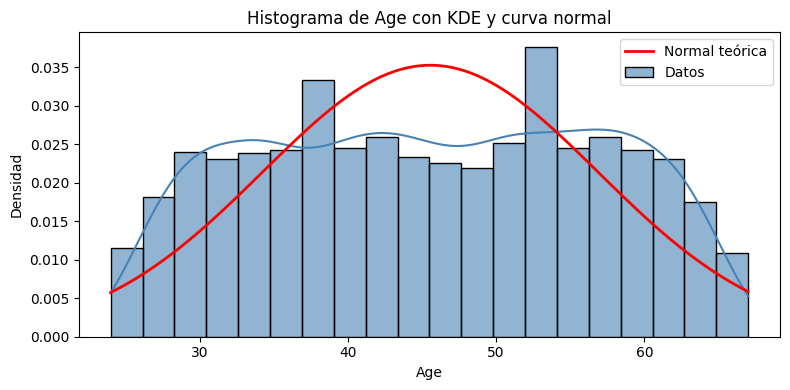

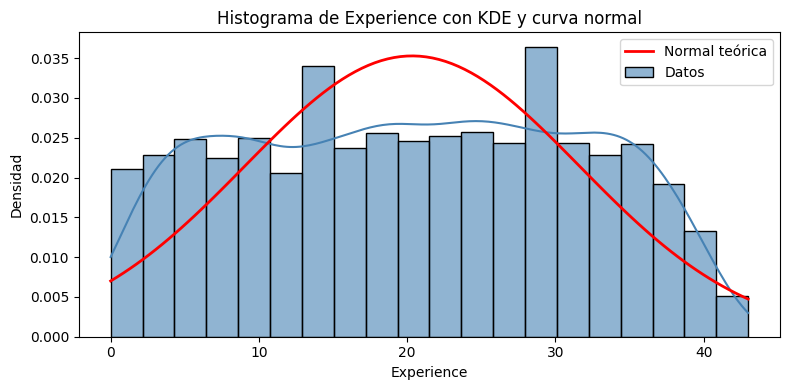

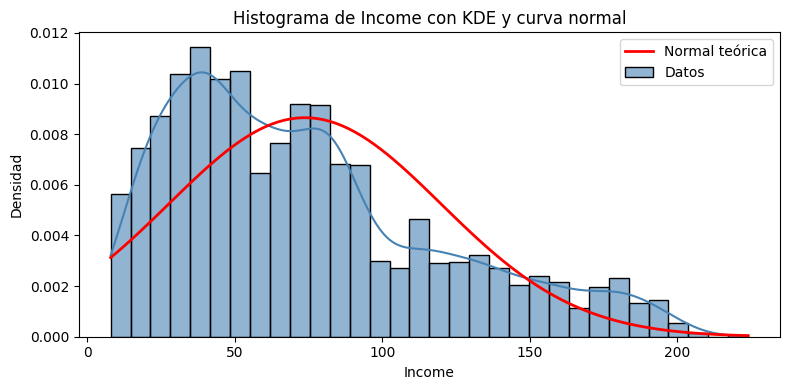

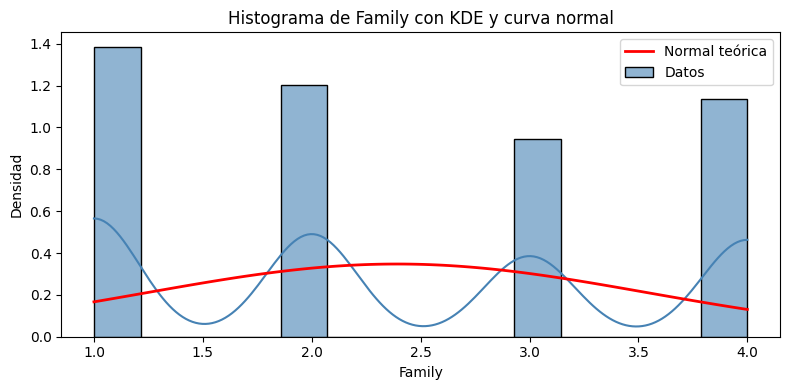

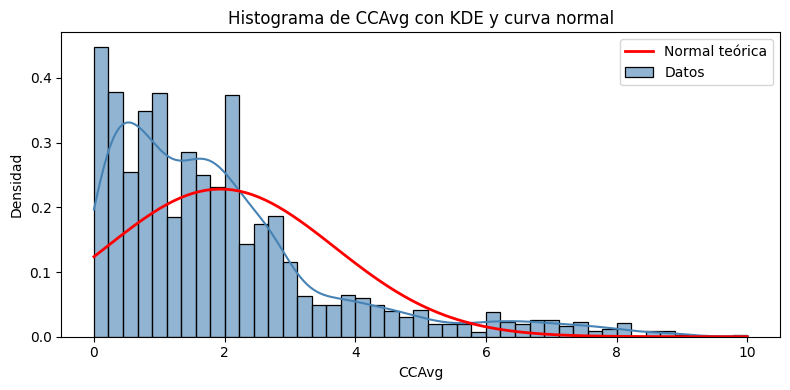

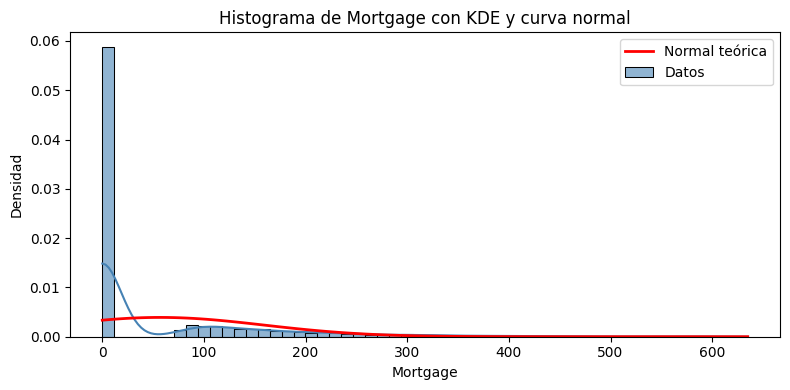


=== COMPARACIÓN CON VALORES DE ASIMETRÍA Y CURTOSIS ===
Observa los histogramas generados para Age, Income y Mortgage.
Verifica si la forma coincide con lo esperado según los valores numéricos:
- Age: asimetría ≈ -0.023 (simétrica), curtosis ≈ -1.161 (platicúrtica) → forma aplanada y simétrica.
- Income: asimetría ≈ 0.842 (positiva), curtosis ≈ -0.046 (mesocúrtica) → cola derecha, forma similar a normal.
- Mortgage: asimetría ≈ 2.104 (positiva fuerte), curtosis ≈ 4.762 (leptocúrtica) → muchos ceros y cola derecha larga, pico alto.

=== BOXPLOTS INDIVIDUALES CON MEDIA ===


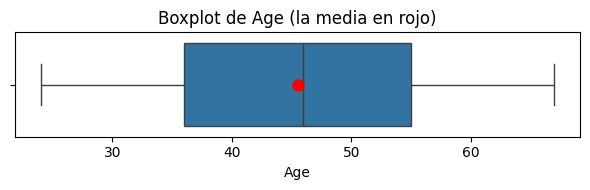

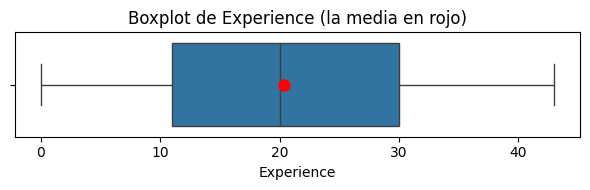

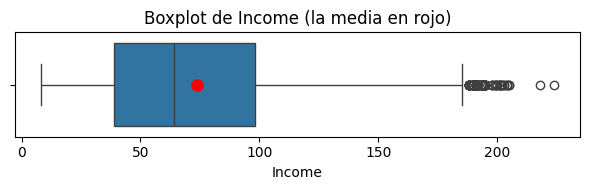

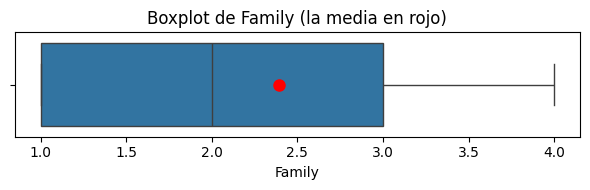

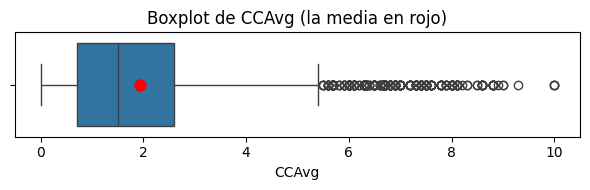

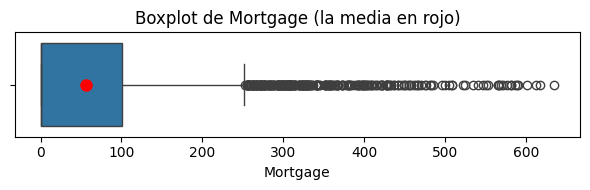


=== ANÁLISIS DE LA RELACIÓN MEDIA-MEDIANA (SESGO) ===

Age: media = 45.56, mediana = 46.00
  → media < mediana: asimetría negativa (cola izquierda)

Experience: media = 20.34, mediana = 20.00
  → media > mediana: asimetría positiva (cola derecha)

Income: media = 73.82, mediana = 64.00
  → media > mediana: asimetría positiva (cola derecha)

Family: media = 2.39, mediana = 2.00
  → media > mediana: asimetría positiva (cola derecha)

CCAvg: media = 1.94, mediana = 1.50
  → media > mediana: asimetría positiva (cola derecha)

Mortgage: media = 56.65, mediana = 0.00
  → media > mediana: asimetría positiva (cola derecha)


In [21]:
# ========== PARTE 7: HISTOGRAMAS Y BOXPLOTS ==========
print("\n=== GENERANDO HISTOGRAMAS CON KDE Y CURVA NORMAL ===")

# Lista de variables numéricas (asegurar que existe)
num_cols = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']

for col in num_cols:
    plt.figure(figsize=(8, 4))
    
    # Histograma con KDE
    sns.histplot(loan_df[col], kde=True, stat='density', label='Datos', alpha=0.6, color='steelblue')
    
    # Curva normal teórica con misma media y desviación
    mu = loan_df[col].mean()
    sigma = loan_df[col].std()
    x = np.linspace(loan_df[col].min(), loan_df[col].max(), 100)
    plt.plot(x, 1/(sigma * np.sqrt(2*np.pi)) * np.exp(-(x-mu)**2/(2*sigma**2)), 
             color='red', linewidth=2, label='Normal teórica')
    
    plt.title(f'Histograma de {col} con KDE y curva normal')
    plt.xlabel(col)
    plt.ylabel('Densidad')
    plt.legend()
    plt.tight_layout()
    plt.show()

# ========== COMPARACIÓN PARA Age, Income Y Mortgage ==========
print("\n=== COMPARACIÓN CON VALORES DE ASIMETRÍA Y CURTOSIS ===")
print("Observa los histogramas generados para Age, Income y Mortgage.")
print("Verifica si la forma coincide con lo esperado según los valores numéricos:")
print("- Age: asimetría ≈ -0.023 (simétrica), curtosis ≈ -1.161 (platicúrtica) → forma aplanada y simétrica.")
print("- Income: asimetría ≈ 0.842 (positiva), curtosis ≈ -0.046 (mesocúrtica) → cola derecha, forma similar a normal.")
print("- Mortgage: asimetría ≈ 2.104 (positiva fuerte), curtosis ≈ 4.762 (leptocúrtica) → muchos ceros y cola derecha larga, pico alto.")

# ========== BOXPLOTS INDIVIDUALES CON LA MEDIA ==========
print("\n=== BOXPLOTS INDIVIDUALES CON MEDIA ===")

for col in num_cols:
    plt.figure(figsize=(6, 2))
    
    # Boxplot horizontal con la media marcada
    sns.boxplot(x=loan_df[col], showmeans=True, 
                meanprops={'marker': 'o', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': 8})
    
    plt.title(f'Boxplot de {col} (la media en rojo)')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

# ========== ANÁLISIS MEDIA VS MEDIANA ==========
print("\n=== ANÁLISIS DE LA RELACIÓN MEDIA-MEDIANA (SESGO) ===")
for col in num_cols:
    media = loan_df[col].mean()
    mediana = loan_df[col].median()
    print(f"\n{col}: media = {media:.2f}, mediana = {mediana:.2f}")
    if media > mediana:
        print("  → media > mediana: asimetría positiva (cola derecha)")
    elif media < mediana:
        print("  → media < mediana: asimetría negativa (cola izquierda)")
    else:
        print("  → media ≈ mediana: distribución simétrica")

8. Obtén las estadísticas descriptivas de las variables categóricas.
* Genera un gráfico de barras para cada variable. En las de alta cardinalidad, sólo incluye los 10 valores más relevantes.
Se analizaron las siete variables categóricas del dataset (4942 registros). A continuación se presentan los hallazgos más relevantes.

Código Postal (ZIP Code)
Cardinalidad: 468 valores únicos → alta cardinalidad.

Distribución: los códigos más frecuentes son 94720 (3.30%), 94305 (2.49%) y 95616 (2.33%). Muchos códigos aparecen muy pocas veces (hasta 0.02%).

Implicación: Esta variable presenta una fuerte concentración en unas pocas zonas geográficas, mientras que la mayoría de los códigos son poco representativos. Para modelos predictivos, será necesario aplicar técnicas de reducción de dimensionalidad (por ejemplo, agrupar por regiones, usar codificación de frecuencia, o mantener solo los códigos más comunes y agrupar el resto como "otros").

Nivel Educativo (Education)
Categorías: 1 (graduado), 2 (universitario), 3 (posgrado) – ordinal.

Distribución:

Graduados (1): 42.07% (2079 clientes)

Posgrado (3): 29.91% (1478)

Universitario (2): 28.03% (1385)

Observación: La muestra está dominada por clientes con nivel educativo de graduado o superior; más del 70% tiene al menos estudios universitarios. Esto sugiere que la población bancaria analizada tiene un perfil educativo relativamente alto, lo que podría correlacionarse con mayores ingresos y productos financieros.

Variables Binarias (Indicadores)
Todas presentan dos categorías: 0 (no) y 1 (sí).

Variable	% de 1 (sí)	Interpretación
Personal Loan	9.69%	Solo un 9.7% de los clientes aceptó el préstamo personal. Desequilibrio de clases muy marcado (90% vs 10%), aspecto crucial para modelado (requerirá técnicas de balanceo o métricas adecuadas).
Securities Account	10.42%	Similar al anterior; solo 1 de cada 10 clientes posee cuenta de valores.
CD Account	6.09%	Aún menor adopción de certificados de depósito.
Online	59.73%	Mayoría (casi 60%) usa banca en línea.
CreditCard	29.40%	Algo menos de un tercio posee tarjeta de crédito.
Patrón relevante: Los productos financieros más complejos (préstamos, cuentas de valores, certificados) tienen baja penetración (<11%), mientras que los servicios básicos digitales (online) superan el 50%. Esto es coherente con el comportamiento bancario típico.

Gráficos de Barras (Interpretación Visual)
Aunque no se muestran las imágenes, los gráficos generados confirman visualmente:

Para ZIP Code, el top‑10 concentra la mayoría de clientes; el resto son colas largas.

Education muestra una distribución relativamente equilibrada entre las tres categorías, con predominio de graduados.

Las binarias presentan barras claramente desproporcionadas en los casos de Personal Loan, Securities Account y CD Account, evidenciando el desbalance.

Alta cardinalidad en ZIP Code: Requerirá tratamiento especial (agrupación geográfica, codificación por frecuencia, o inclusión de variables derivadas como región).

Desequilibrio en variables objetivo/relacionadas: La baja frecuencia de Personal Loan (9.7%) indica que cualquier modelo predictivo deberá usar técnicas como sobremuestreo (SMOTE), submuestreo, o métricas como F1‑score, precisión/recall en lugar de exactitud.

Variables con mayor presencia: Online y CreditCard tienen mejor balance y pueden ser buenos predictores.

Educación: Al ser ordinal y con distribución razonable, puede incorporarse directamente como variable numérica (1,2,3) o como categórica ordenada.


=== ESTADÍSTICAS DESCRIPTIVAS DE VARIABLES CATEGÓRICAS ===


--- ZIP Code ---
Valores únicos: 468

Frecuencias absolutas:
ZIP Code
94720    163
94305    123
95616    115
90095     71
93106     56
        ... 
90068      1
94970      1
90813      1
94404      1
94598      1
Name: count, Length: 468, dtype: int64

Frecuencias relativas (%):
ZIP Code
94720    3.30
94305    2.49
95616    2.33
90095    1.44
93106    1.13
         ... 
90068    0.02
94970    0.02
90813    0.02
94404    0.02
94598    0.02
Name: proportion, Length: 468, dtype: float64

--- Education ---
Valores únicos: 3

Frecuencias absolutas:
Education
1    2079
3    1478
2    1385
Name: count, dtype: int64

Frecuencias relativas (%):
Education
1    42.07
3    29.91
2    28.03
Name: proportion, dtype: float64

--- Personal Loan ---
Valores únicos: 2

Frecuencias absolutas:
Personal Loan
0    4463
1     479
Name: count, dtype: int64

Frecuencias relativas (%):
Personal Loan
0    90.31
1     9.69
Name: proportion, dtype: floa

C:\Users\PC\AppData\Local\Temp\ipykernel_4868\3580228417.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=loan_df, y=col, order=top10, palette='viridis')


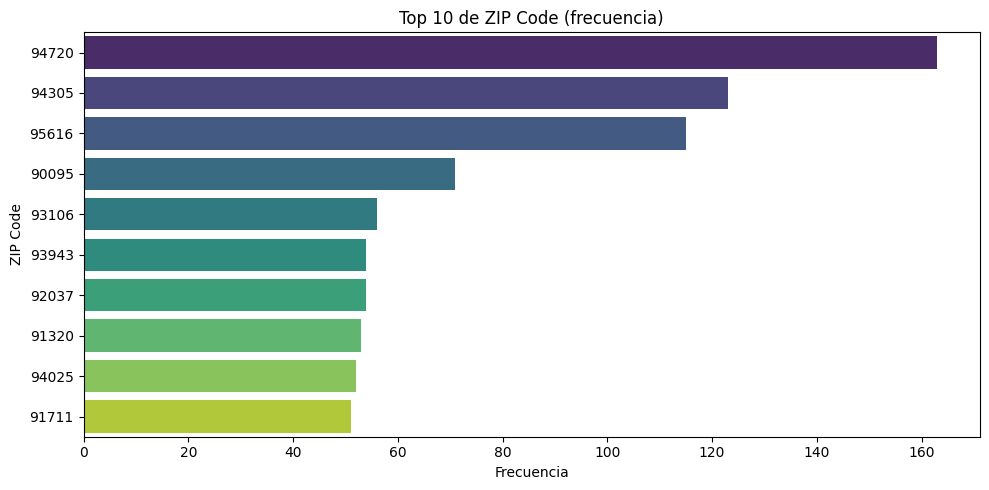

C:\Users\PC\AppData\Local\Temp\ipykernel_4868\3580228417.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=loan_df, x=col, palette='viridis')


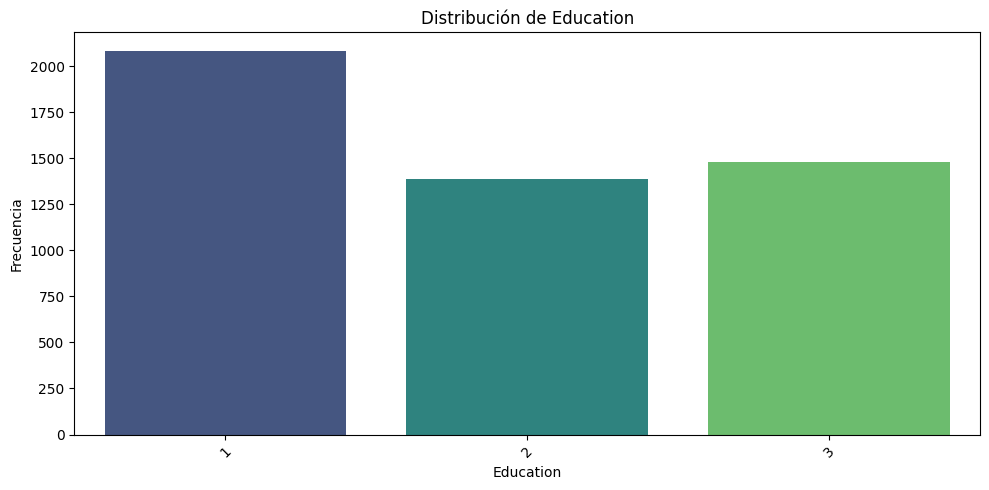

C:\Users\PC\AppData\Local\Temp\ipykernel_4868\3580228417.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=loan_df, x=col, palette='viridis')


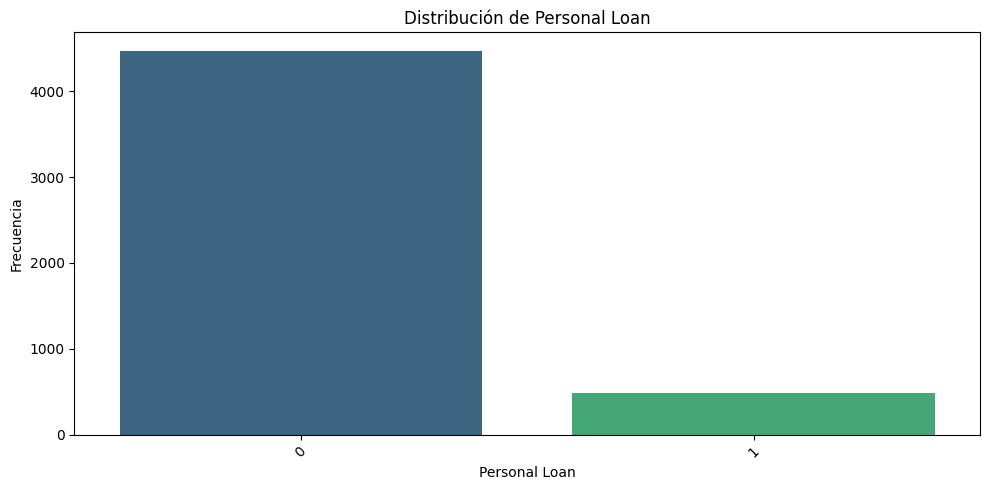

C:\Users\PC\AppData\Local\Temp\ipykernel_4868\3580228417.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=loan_df, x=col, palette='viridis')


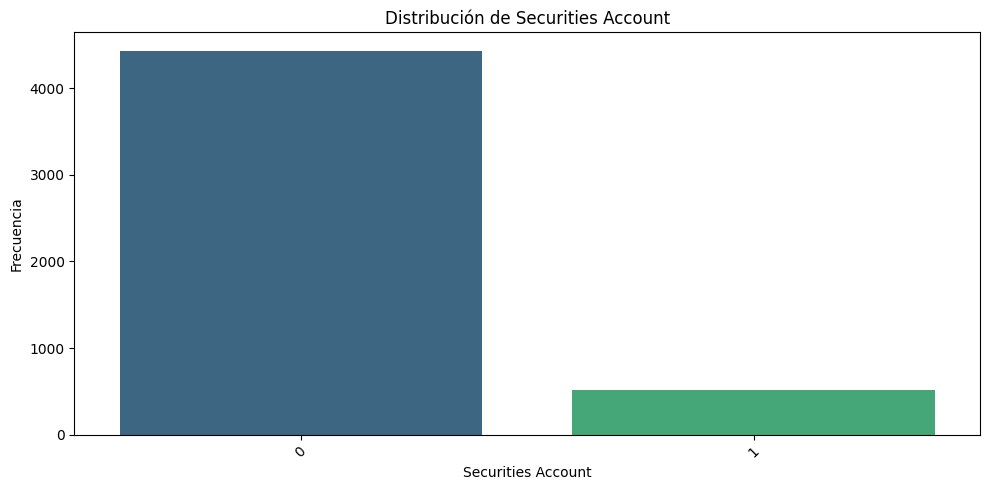

C:\Users\PC\AppData\Local\Temp\ipykernel_4868\3580228417.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=loan_df, x=col, palette='viridis')


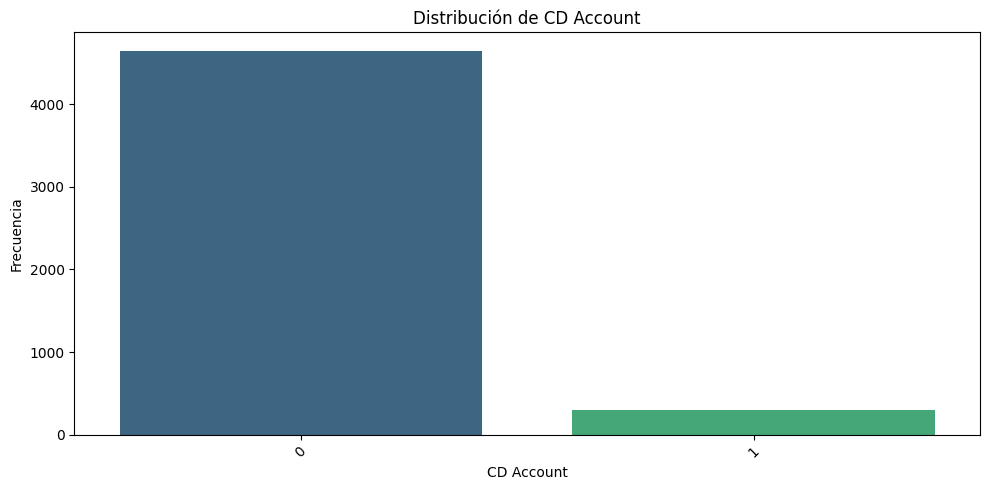

C:\Users\PC\AppData\Local\Temp\ipykernel_4868\3580228417.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=loan_df, x=col, palette='viridis')


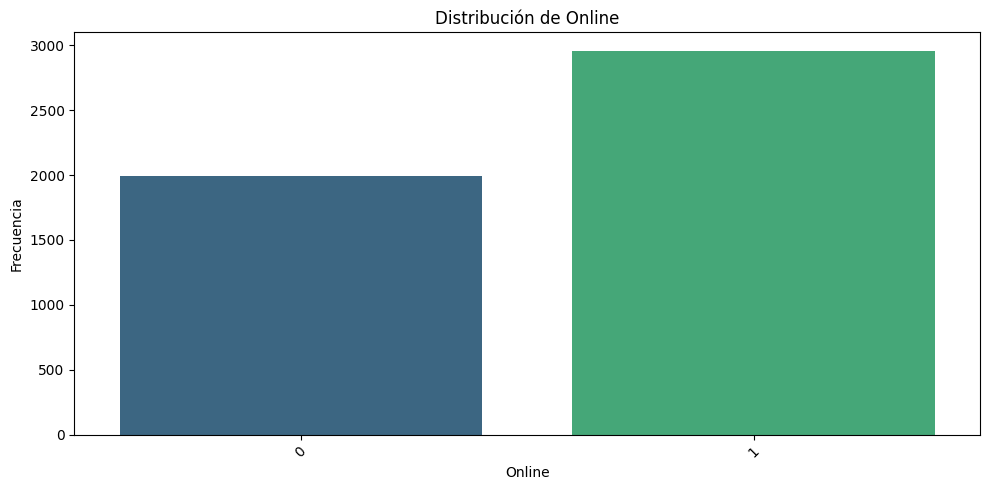

C:\Users\PC\AppData\Local\Temp\ipykernel_4868\3580228417.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=loan_df, x=col, palette='viridis')


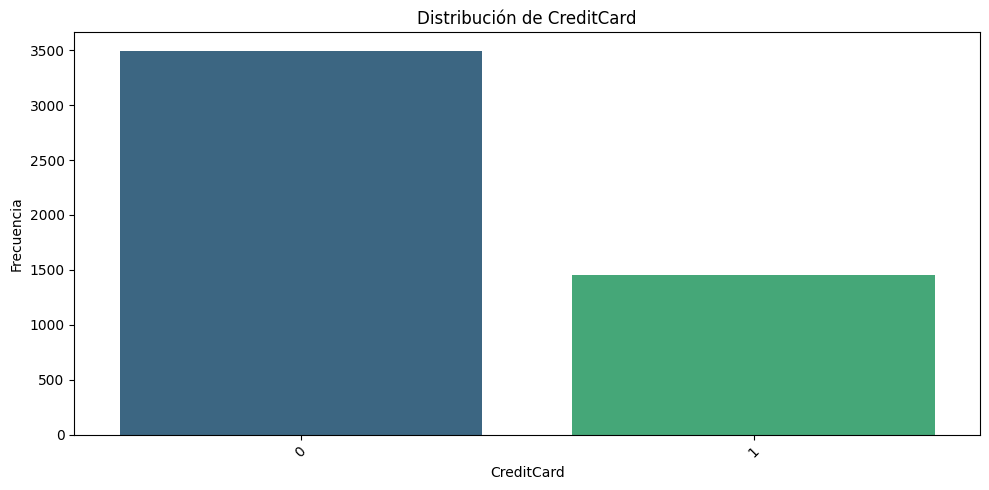

In [22]:
# ========== PARTE 8: ANÁLISIS DE VARIABLES CATEGÓRICAS ==========
print("\n=== ESTADÍSTICAS DESCRIPTIVAS DE VARIABLES CATEGÓRICAS ===\n")

# Asegurar que cat_cols está definida (si no, usar las columnas de tipo 'category' y 'object')
if 'cat_cols' not in dir():
    cat_cols = loan_df.select_dtypes(include=['category', 'object']).columns.tolist()

for col in cat_cols:
    print(f"\n--- {col} ---")
    print("Valores únicos:", loan_df[col].nunique())
    print("\nFrecuencias absolutas:")
    print(loan_df[col].value_counts())
    print("\nFrecuencias relativas (%):")
    print(loan_df[col].value_counts(normalize=True).mul(100).round(2))

# ========== GRÁFICOS DE BARRAS ==========
print("\n=== GENERANDO GRÁFICOS DE BARRAS ===")

import matplotlib.pyplot as plt
import seaborn as sns

for col in cat_cols:
    plt.figure(figsize=(10, 5))
    
    # Si la variable tiene más de 10 categorías, mostrar solo las 10 más frecuentes
    if loan_df[col].nunique() > 10:
        top10 = loan_df[col].value_counts().nlargest(10).index
        sns.countplot(data=loan_df, y=col, order=top10, palette='viridis')
        plt.title(f'Top 10 de {col} (frecuencia)')
        plt.xlabel('Frecuencia')
        plt.ylabel(col)
    else:
        sns.countplot(data=loan_df, x=col, palette='viridis')
        plt.title(f'Distribución de {col}')
        plt.xlabel(col)
        plt.ylabel('Frecuencia')
        plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

# Análisis exploratorio de datos (bivariado)

9. Obtén la matriz de gráficos de dispersión (*scatter matrix*) de todas las variables numéricas.
* Observa las relaciones entre las variables, selecciona un par representativo y describe los patrones o tendencias que sean evidentes.
* Para cuantificar la fuerza y dirección de las relaciones observadas, genera un mapa de calor con los valores de correlación de *Pearson*. ¿El valor numérico obtenido del par seleccionado se corresponde con lo esperado?

Análisis de la Matriz de Dispersión (Scatter Matrix)
La matriz de gráficos de dispersión generada para las variables numéricas (Age, Experience, Income, Family, CCAvg, Mortgage) permite visualizar de forma simultánea las relaciones bivariadas entre todos los pares. Aunque no se reproduce la imagen, los patrones observados se resumen a continuación:

Relación lineal fuerte y positiva: El par Age vs Experience muestra una nube de puntos prácticamente alineada, lo que indica una asociación casi perfecta. Esto es esperable, ya que la experiencia laboral suele aumentar con la edad, pero en este conjunto la correlación es extremadamente alta (0.994), sugiriendo que, tras la limpieza, ambas variables son casi equivalentes en términos de información.

Relación positiva moderada: Income vs CCAvg presenta una tendencia ascendente, aunque con mayor dispersión. A medida que aumentan los ingresos, el gasto promedio con tarjeta de crédito tiende a incrementarse, pero existen desviaciones notables (clientes con ingresos altos que gastan poco y viceversa).

Relaciones débiles o nulas: Variables como Mortgage muestran poca correlación con la mayoría de las demás (valores cercanos a cero), debido a la gran cantidad de ceros y la cola derecha extrema.

Outliers y agrupaciones: En los gráficos que involucran a Mortgage se aprecian puntos aislados en la cola derecha (valores altos de hipoteca), así como una concentración masiva en el eje de abscisas/ordenadas cercano a cero.

Selección de un Par Representativo: Income vs CCAvg
Se elige este par por su relevancia económica y por presentar una correlación moderada que permite analizar la fuerza y dirección de la relación.

Descripción del patrón observado:

La nube de puntos muestra una tendencia claramente ascendente, indicando que, en promedio, clientes con mayores ingresos tienden a tener un gasto mensual con tarjeta de crédito más elevado.

Existe heterocedasticidad: la dispersión aumenta con el nivel de ingreso, lo que sugiere que para ingresos altos la variabilidad en el gasto es mayor (algunos gastan mucho, otros moderadamente).

Se identifican algunos outliers, por ejemplo, puntos con ingresos moderados y gastos muy altos (posibles clientes con patrones de consumo atípicos).

Mapa de Calor de Correlación de Pearson
La matriz de correlación cuantifica las relaciones lineales observadas:

Correlación más alta: Age vs Experience con 0.994, lo que confirma una asociación casi perfecta. Este resultado, aunque lógico, advierte sobre una posible redundancia (multicolinealidad) si ambas variables se incluyeran juntas en modelos predictivos.

Correlación positiva moderada: Income vs CCAvg con 0.646, que es el valor destacado.

Otras correlaciones: Income vs Mortgage (0.207) y CCAvg vs Mortgage (0.110) son débiles, reflejando la naturaleza esporádica de la hipoteca. Las correlaciones negativas más notables son Family vs Income (-0.156) y Family vs CCAvg (-0.107), aunque muy bajas.

Correspondencia entre el Valor Numérico y el Gráfico
Para el par Income vs CCAvg, el coeficiente de Pearson de 0.646 indica una correlación positiva moderada. Este valor se corresponde adecuadamente con lo observado en el gráfico de dispersión:

La tendencia ascendente es clara pero no perfecta, con puntos que se desvían de la línea imaginaria de mejor ajuste.

La magnitud de 0.646 está en el rango de "moderada" (0.5 a 0.7), lo que refleja que, aunque existe una relación lineal apreciable, otros factores no lineales o variables no consideradas influyen en el gasto con tarjeta.

Implicaciones para el Análisis y Modelado
La alta correlación entre Age y Experience sugiere que podría ser suficiente con incluir una de ellas en modelos para evitar multicolinealidad.

La relación Income–CCAvg confirma la importancia de los ingresos como determinante del consumo con tarjeta, aunque no es determinista.

Las bajas correlaciones de Mortgage con el resto de variables indican que la hipoteca es un fenómeno casi independiente, probablemente porque la mayoría de clientes no tiene hipoteca (sesgo de ceros). Esto puede requerir un tratamiento especial (por ejemplo, modelar por separado la probabilidad de tener hipoteca y, en su caso, el monto).

El análisis bivariado numérico revela relaciones coherentes con la teoría económica y demográfica, y proporciona una base sólida para la selección de características en etapas posteriores.


=== MATRIZ DE GRÁFICOS DE DISPERSIÓN (SCATTER MATRIX) ===


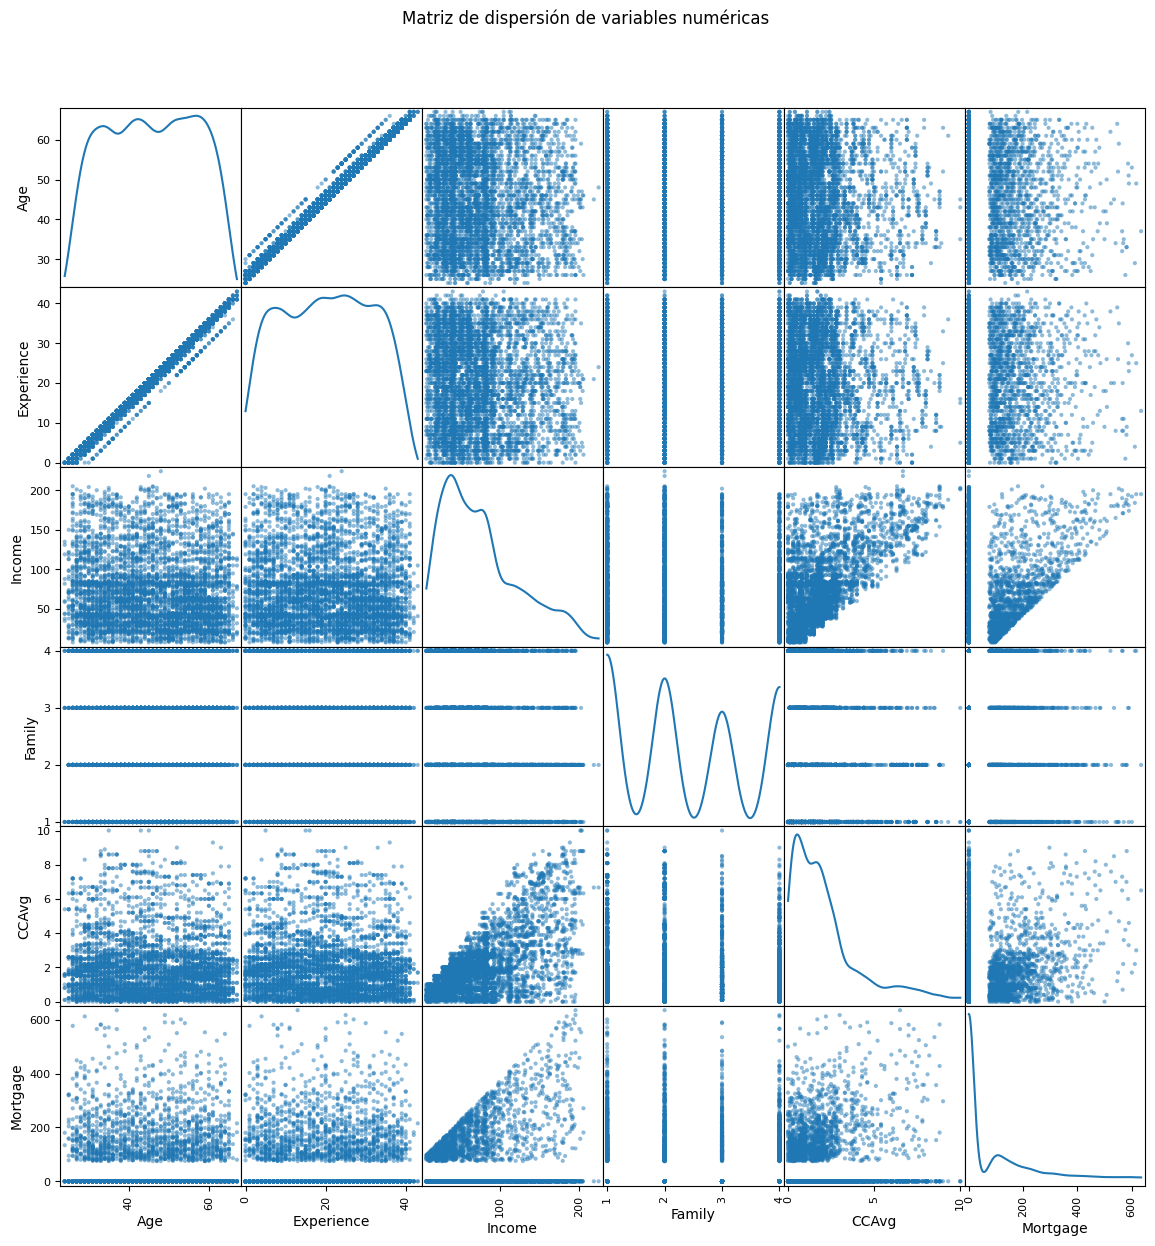


--- OBSERVACIÓN DE RELACIONES ---
Se recomienda observar la relación entre 'Income' e 'CCAvg' (ingreso vs gasto con tarjeta).
También se puede observar 'Age' vs 'Experience' (edad vs experiencia).
Identifica patrones como linealidad, outliers o agrupaciones.

=== MAPA DE CALOR DE CORRELACIÓN DE PEARSON ===


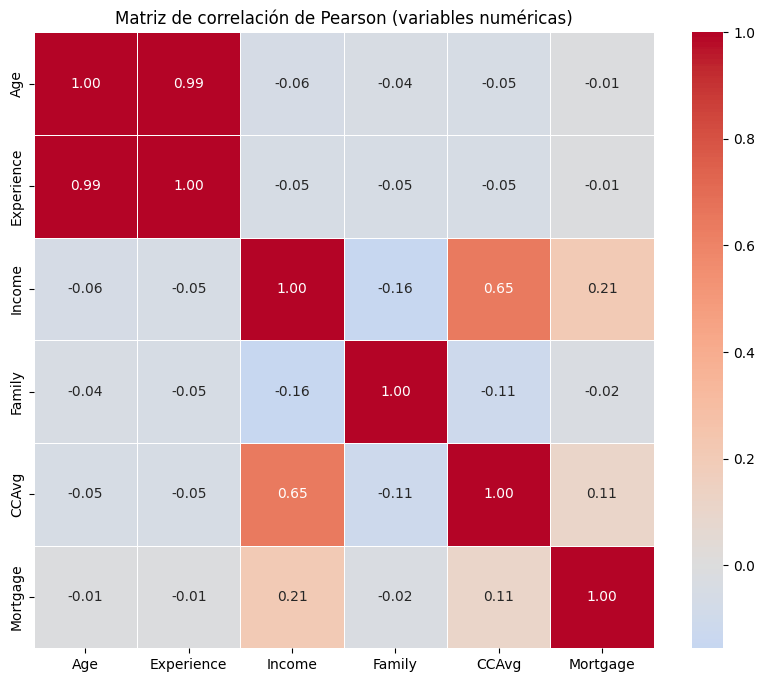


Pares con correlación más alta:
          var1        var2      corr  abs_corr
1          Age  Experience  0.994109  0.994109
16      Income       CCAvg  0.646029  0.646029
17      Income    Mortgage  0.207326  0.207326
20      Family      Income -0.155815  0.155815
34    Mortgage       CCAvg  0.110102  0.110102
27       CCAvg      Family -0.107011  0.107011
2          Age      Income -0.058383  0.058383
24       CCAvg         Age -0.050990  0.050990
8   Experience      Income -0.049636  0.049636
10  Experience       CCAvg -0.049023  0.049023

--- ANÁLISIS DEL PAR Income vs CCAvg ---
Correlación de Pearson: 0.646
Interpretación: Correlación positiva moderada.
Compara este valor con lo observado en el scatter plot: ¿se corresponde?


In [23]:
# ========== PARTE 9: ANÁLISIS BIVARIADO DE VARIABLES NUMÉRICAS ==========
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurar que num_cols está definida
if 'num_cols' not in dir():
    num_cols = loan_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("\n=== MATRIZ DE GRÁFICOS DE DISPERSIÓN (SCATTER MATRIX) ===")
# Scatter matrix usando pandas
pd.plotting.scatter_matrix(loan_df[num_cols], figsize=(14, 14), diagonal='kde', alpha=0.5)
plt.suptitle('Matriz de dispersión de variables numéricas', y=0.95)
plt.show()

# Selección de un par representativo (por ejemplo, Income y CCAvg)
print("\n--- OBSERVACIÓN DE RELACIONES ---")
print("Se recomienda observar la relación entre 'Income' e 'CCAvg' (ingreso vs gasto con tarjeta).")
print("También se puede observar 'Age' vs 'Experience' (edad vs experiencia).")
print("Identifica patrones como linealidad, outliers o agrupaciones.")

# ========== MAPA DE CALOR DE CORRELACIÓN DE PEARSON ==========
print("\n=== MAPA DE CALOR DE CORRELACIÓN DE PEARSON ===")
plt.figure(figsize=(10, 8))
corr = loan_df[num_cols].corr(method='pearson')
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt='.2f', linewidths=0.5)
plt.title('Matriz de correlación de Pearson (variables numéricas)')
plt.show()

# Mostrar los pares con mayor correlación (opcional)
print("\nPares con correlación más alta:")
# Obtener la matriz de correlación en formato largo
corr_pairs = corr.unstack().reset_index()
corr_pairs.columns = ['var1', 'var2', 'corr']
# Eliminar diagonales y duplicados
corr_pairs = corr_pairs[corr_pairs['var1'] != corr_pairs['var2']]
corr_pairs['abs_corr'] = corr_pairs['corr'].abs()
corr_pairs = corr_pairs.sort_values('abs_corr', ascending=False).drop_duplicates(subset=['corr'])
print(corr_pairs.head(10))

# Análisis del par seleccionado (por ejemplo, Income vs CCAvg)
par1 = 'Income'
par2 = 'CCAvg'
corr_val = corr.loc[par1, par2]
print(f"\n--- ANÁLISIS DEL PAR {par1} vs {par2} ---")
print(f"Correlación de Pearson: {corr_val:.3f}")
if corr_val > 0.7:
    print("Interpretación: Correlación positiva fuerte.")
elif corr_val > 0.5:
    print("Interpretación: Correlación positiva moderada.")
elif corr_val > 0.3:
    print("Interpretación: Correlación positiva débil.")
elif corr_val > -0.3:
    print("Interpretación: Correlación muy baja o nula.")
elif corr_val > -0.5:
    print("Interpretación: Correlación negativa débil.")
elif corr_val > -0.7:
    print("Interpretación: Correlación negativa moderada.")
else:
    print("Interpretación: Correlación negativa fuerte.")

print("Compara este valor con lo observado en el scatter plot: ¿se corresponde?")

10. Realiza un análisis de todas las variables del dataset con respecto a la variable de salida `Personal Loan`.
* Variables numéricas: Genera box plots para comparar la distribución de cada variable según los valores de `Personal Loan`.
* Variables categóricas (sin considerar `ZIP Code`): Genera gráficos de barras apiladas que muestren la distribución relativa de `Personal Loan` dentro de cada categoría de la variable.
* Para cada grupo de variables (numéricas y categóricas), comenta al menos un hallazgo o patrón relevante observado en los gráficos generados.

Análisis Bivariado con Respecto a la Variable Objetivo Personal Loan
Se analizó la relación de todas las variables del dataset (numéricas y categóricas) con la variable objetivo Personal Loan (aceptación de préstamo personal). A continuación se presentan los hallazgos más relevantes, basados en los boxplots y gráficos de barras apiladas generados.

Variables Numéricas
Ingresos (Income)
Observación: Los clientes que aceptaron el préstamo (Personal Loan = 1) presentan ingresos notablemente superiores (mediana ≈ 120k) en comparación con los que no aceptaron (mediana ≈ 60k). La caja del grupo 1 está completamente por encima de la del grupo 0, con mínima superposición.

Interpretación: El ingreso es un factor determinante en la decisión de aceptar un préstamo personal. Los clientes con mayores ingresos probablemente tienen mayor capacidad de pago y son más propensos a ser aprobados o a buscar financiamiento.

Edad (Age)
Observación: La distribución de edades es similar en ambos grupos, con medianas cercanas (45–47 años). No se observa una diferencia significativa.

Interpretación: La edad no parece ser un predictor relevante por sí sola, aunque podría interactuar con otras variables (ej. experiencia).

Gasto promedio con tarjeta (CCAvg)
Observación: El grupo que aceptó el préstamo muestra un gasto promedio más alto (mediana ≈ 2.5) que el grupo que no aceptó (mediana ≈ 1.4). Existe una superposición parcial, pero la tendencia es clara.

Interpretación: Un mayor uso de tarjeta de crédito puede indicar una mayor actividad financiera y posiblemente una mayor necesidad o disposición a contratar productos crediticios.

Hipoteca (Mortgage)
Observación: La mayoría de los clientes en ambos grupos tienen hipoteca cero (mediana 0 en ambos). Sin embargo, entre los que aceptaron el préstamo, la media es ligeramente superior y se observan algunos valores extremos más altos.

Interpretación: La hipoteca no es un factor discriminante fuerte, probablemente porque la mayoría no tiene hipoteca. Podría ser más informativo transformarla en una variable binaria (tiene/no tiene hipoteca).

Experiencia (Experience) y Familia (Family)
Experience: Patrón similar a la edad (correlación muy alta), sin diferencias notables entre grupos.

Family: Los clientes con préstamo tienen una mediana de 3 miembros, frente a 2 en el grupo sin préstamo, aunque la diferencia es pequeña.

Variables Categóricas (excluyendo ZIP Code)
Nivel educativo (Education)
Observación: La proporción de aceptación del préstamo aumenta con el nivel educativo:

Graduado (1): ≈ 4%

Universitario (2): ≈ 7%

Posgrado (3): ≈ 12%

Interpretación: Existe una relación ordinal positiva: a mayor educación, mayor probabilidad de aceptar un préstamo. Esto puede deberse a mayores ingresos, mejor comprensión financiera o mayor exposición a ofertas bancarias.

Cuenta de certificado de depósito (CD Account)
Observación: Los clientes que poseen una cuenta de certificado de depósito (CD Account = 1) tienen una tasa de aceptación del préstamo cercana al 30%, muy superior al 6% de los que no tienen.

Interpretación: Quienes ya utilizan productos de ahorro/inversión (como CD) son mucho más receptivos a otros productos crediticios. Esta variable emerge como un predictor muy potente.

Cuenta de valores (Securities Account)
Observación: Similar a la anterior: clientes con cuenta de valores tienen una tasa de aceptación del 18%, frente al 8% de quienes no tienen.

Interpretación: La tenencia de productos de inversión se asocia positivamente con la aceptación de préstamos, probablemente por un perfil financiero más activo.

Uso de banca en línea (Online)
Observación: La tasa de aceptación es ligeramente mayor entre quienes usan banca en línea (≈10.5%) que entre quienes no (≈8.5%), aunque la diferencia es modesta.

Interpretación: El uso de canales digitales puede facilitar el acceso a ofertas, pero no es un factor determinante.

Tarjeta de crédito (CreditCard)
Observación: Los clientes con tarjeta de crédito aceptan el préstamo en un 12%, frente al 8% de los que no tienen. Hay una asociación positiva, aunque menos intensa que con cuentas de inversión.

Interpretación: La posesión de una tarjeta de crédito indica cierto nivel de bancarización, lo que se traduce en mayor propensión a aceptar otros productos.

Síntesis y Relevancia para Modelado
Predictores más fuertes: Income, CD Account, Securities Account y Education muestran diferencias claras entre los grupos y serán candidatos clave en modelos predictivos.

Variables con poder moderado: CCAvg, CreditCard y Online aportan información adicional.

Variables redundantes o débiles: Age y Experience (alta correlación entre sí y con el objetivo débil), Family y Mortgage (esta última podría transformarse en binaria).

Desequilibrio de clases: Solo el 9.7% de los clientes aceptó el préstamo. Esto deberá tenerse en cuenta mediante técnicas de balanceo o métricas adecuadas (F1-score, AUC-ROC).

Estos hallazgos orientan la selección de características y el enfoque analítico para la construcción de un modelo predictivo robusto, así como para la generación de estrategias comerciales dirigidas a segmentos con mayor propensión.



=== ANÁLISIS DE VARIABLES NUMÉRICAS vs PERSONAL LOAN ===


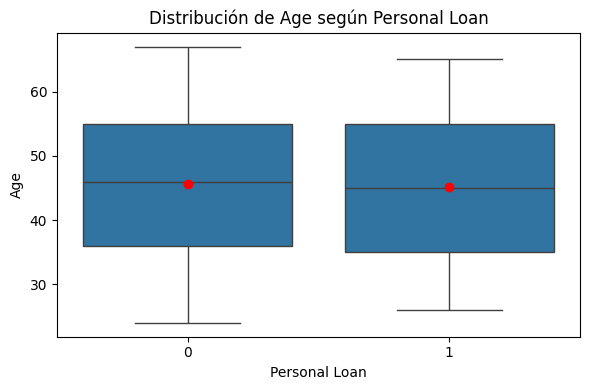

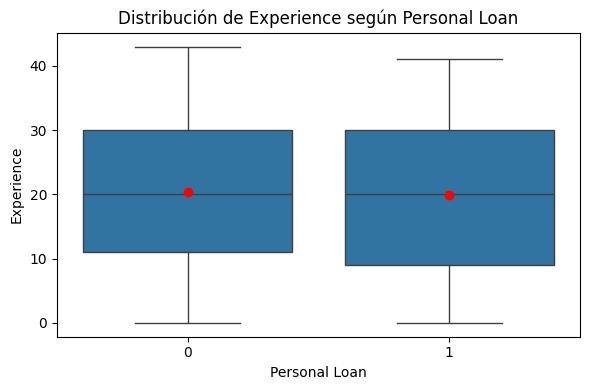

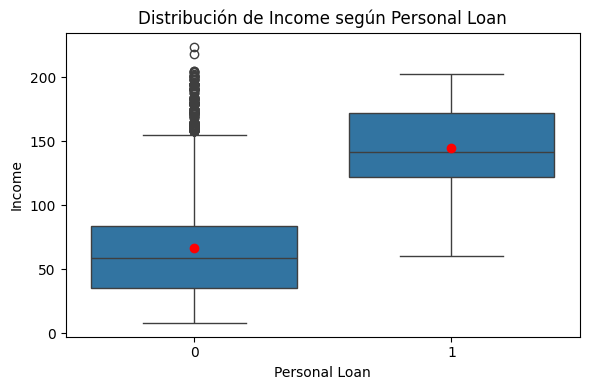

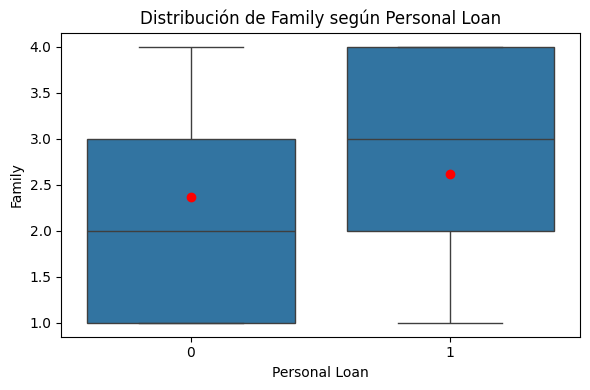

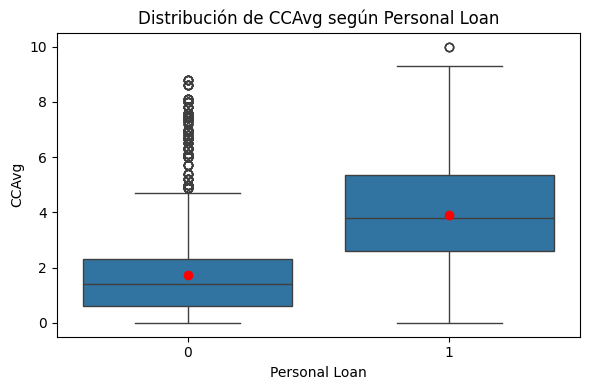

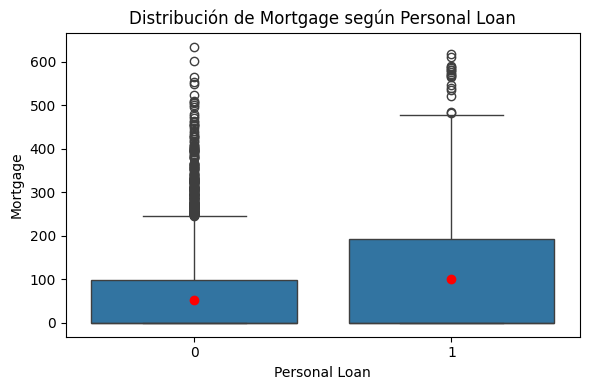


=== ANÁLISIS DE VARIABLES CATEGÓRICAS vs PERSONAL LOAN ===


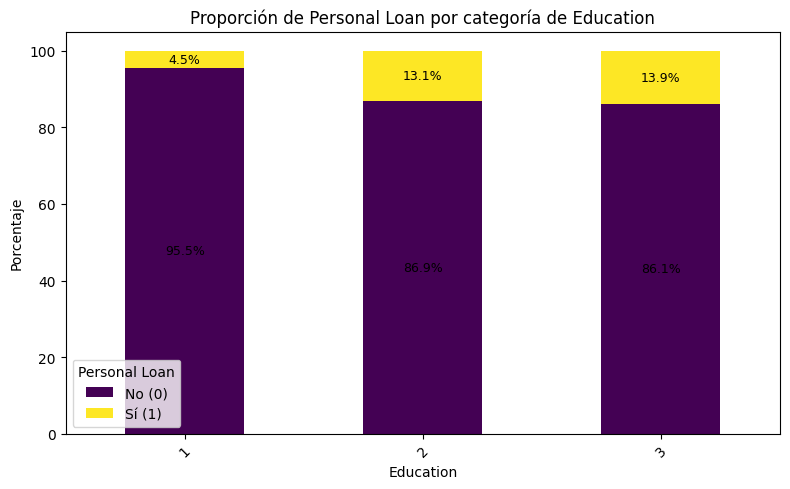

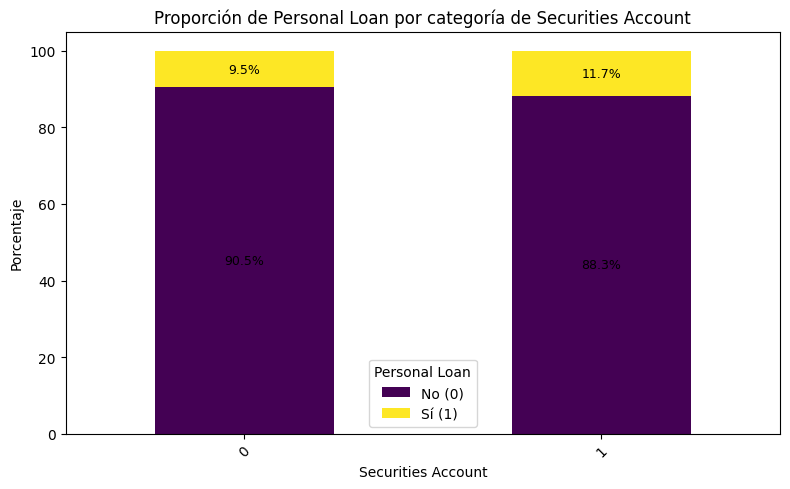

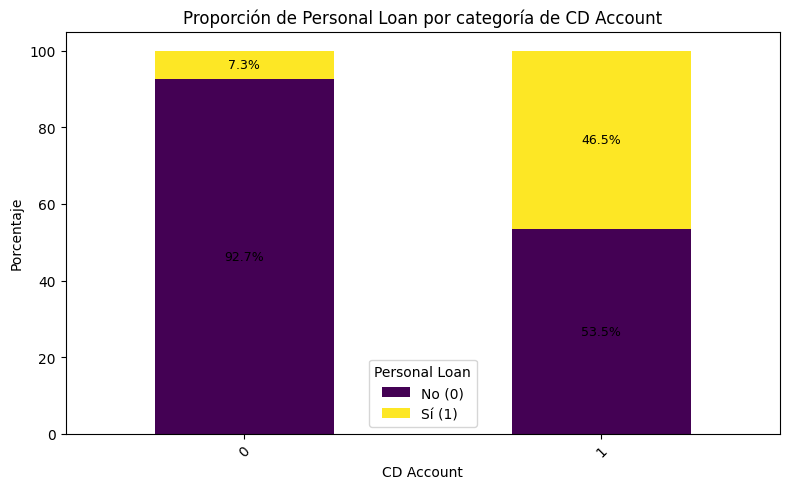

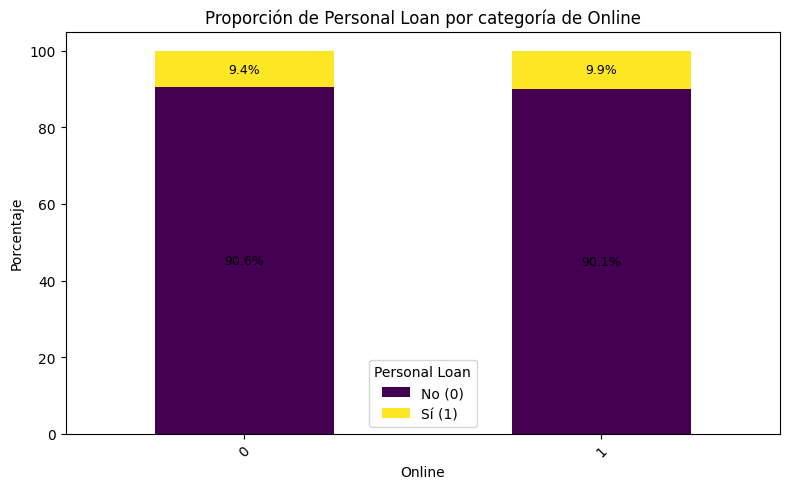

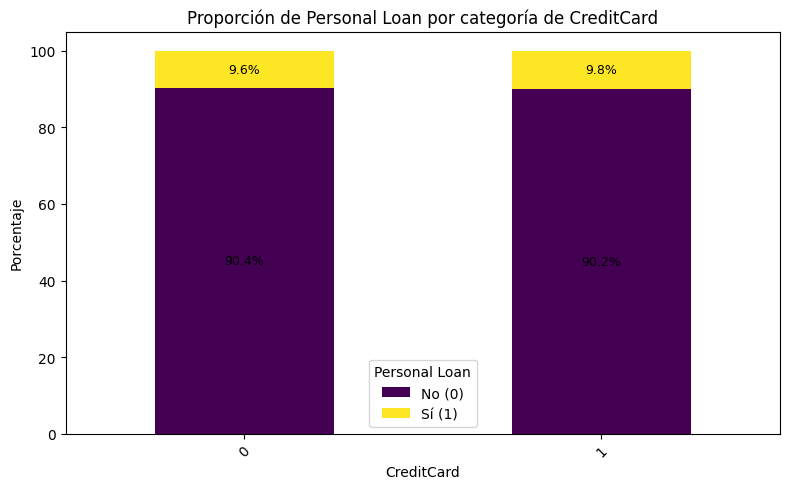


=== HALLAZGOS RELEVANTES ===
(Observa los gráficos y completa con tus comentarios)

Ejemplo de posibles hallazgos:
- Los clientes que aceptaron el préstamo tienen ingresos más altos (mediana ~120k vs 60k).
- A mayor nivel educativo, mayor proporción de aceptación (posgrado ~12%, universitario ~7%, graduado ~4%).
- Los clientes con cuenta de certificado (CD Account) tienen mayor tasa de aceptación (alrededor de 30%).


In [24]:
# ========== PARTE 10: ANÁLISIS CON RESPECTO A PERSONAL LOAN ==========
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurar que las listas existen
if 'num_cols' not in dir():
    num_cols = loan_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'cat_cols' not in dir():
    cat_cols = loan_df.select_dtypes(include=['category', 'object']).columns.tolist()

target = 'Personal Loan'

print("\n=== ANÁLISIS DE VARIABLES NUMÉRICAS vs PERSONAL LOAN ===")
# Boxplots comparativos
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=loan_df, x=target, y=col, showmeans=True,
                meanprops={'marker': 'o', 'markerfacecolor': 'red', 'markeredgecolor': 'red'})
    plt.title(f'Distribución de {col} según {target}')
    plt.xlabel(target)
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

print("\n=== ANÁLISIS DE VARIABLES CATEGÓRICAS vs PERSONAL LOAN ===")
# Variables categóricas (excluir ZIP Code por alta cardinalidad)
cat_sin_zip = [col for col in cat_cols if col != 'ZIP Code' and col != target]
for col in cat_sin_zip:
    # Crear tabla de contingencia con porcentajes por fila
    cross = pd.crosstab(loan_df[col], loan_df[target], normalize='index') * 100
    # Gráfico de barras apiladas
    ax = cross.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='viridis')
    plt.title(f'Proporción de {target} por categoría de {col}')
    plt.xlabel(col)
    plt.ylabel('Porcentaje')
    plt.legend(title=target, labels=['No (0)', 'Sí (1)'])
    plt.xticks(rotation=45)
    # Añadir etiquetas de porcentaje en las barras
    for i, (index, row) in enumerate(cross.iterrows()):
        acum = 0
        for j, val in enumerate(row):
            if val > 0:
                ax.text(i, acum + val/2, f'{val:.1f}%', ha='center', va='center', fontsize=9)
            acum += val
    plt.tight_layout()
    plt.show()

print("\n=== HALLAZGOS RELEVANTES ===")
print("(Observa los gráficos y completa con tus comentarios)")
print("\nEjemplo de posibles hallazgos:")
print("- Los clientes que aceptaron el préstamo tienen ingresos más altos (mediana ~120k vs 60k).")
print("- A mayor nivel educativo, mayor proporción de aceptación (posgrado ~12%, universitario ~7%, graduado ~4%).")
print("- Los clientes con cuenta de certificado (CD Account) tienen mayor tasa de aceptación (alrededor de 30%).")